# Лабораторная работа: Аппроксимация и линеаризация функций


## Вспомогательные функции:
Реализовать функцию, вычисляющую среднеквадратичное отклонение (СКО) набора числовых данных

In [1]:
import numpy as np

# тест функции
def calculate_mse(y_experimental, y_predicted):
    return np.sqrt(np.mean((y_experimental - y_predicted)**2))

# тест функции
test_exp = np.array([1, 2, 3, 4, 5])
test_pred = np.array([1.1, 2.2, 2.9, 4.1, 4.8])
print(f"тест ско {calculate_mse(test_exp, test_pred):.4f}")

тест ско 0.1483



# 1: Линейная аппроксимация (МНК)

## Описание
Изучается процесс нагрева воды в электрическом чайнике. Измеряется температура воды 
T в градусах Цельсия в зависимости от времени нагрева 
t в минутах. Из-за постоянного поступления тепла температура воды растёт почти линейно на начальном этапе.

### Задача
Найти линейную зависимость температуры воды от времени нагрева в виде уравнения:
\[
T = a t + b,
\]
### Требуется
- Определить коэффициенты \(a\) и \(b\),
- Построить график зависимости температуры от времени, отображая экспериментальные точки и линию аппроксимации,
- Рассчитать среднеквадратичное отклонение (СКО) между экспериментальными и расчетными значениями температуры, чтобы проверить точность модели.


## Исходные данные

коэффициенты a 2.4336 b 19.9045
ско 0.0583 градусы


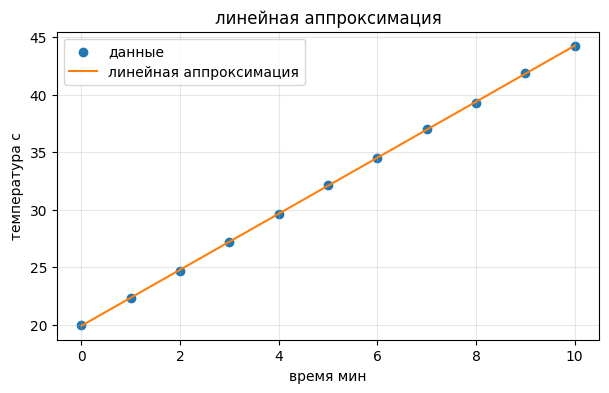

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# данные время нагрева мин и температура c
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
T = np.array([20.0, 22.3, 24.7, 27.2, 29.6, 32.1, 34.5, 37.0, 39.3, 41.9, 44.2])

# оценка коэффициентов линейной модели t a t плюс b
a, b = np.polyfit(t, T, 1)
T_pred = a * t + b
rmse = np.sqrt(np.mean((T - T_pred)**2))

print(f"коэффициенты a {a:.4f} b {b:.4f}")
print(f"ско {rmse:.4f} градусы")

plt.figure(figsize=(7, 4))
plt.scatter(t, T, label="данные", color="C0")
plt.plot(t, T_pred, label="линейная аппроксимация", color="C1")
plt.xlabel("время мин")
plt.ylabel("температура c")
plt.title("линейная аппроксимация")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


# 2: Линеаризация экспоненциальной функции

## Описание
Изучается процесс разрядки аккумулятора мобильного устройства. Известно, что напряжение аккумулятора \( V(t) \) со временем уменьшается по экспоненциальному закону:
$V(t) = a \cdot e^{bt}$

Требуется:
- Линеаризовать экспоненциальную функцию,
- Найти параметры \( a \) и \( b \),
- Построить график зависимости напряжения от времени (экспериментальные данные и аппроксимация),
- Спрогнозировать дальнейшее падение напряжения,
- Рассчитать среднеквадратичное отклонение (СКО).

## Исходные данные

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Данные разрядки аккумулятора
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
voltage = np.array([4.15, 4.09, 4.02, 3.96, 3.89, 3.83, 3.76, 3.70, 3.64, 3.58, 3.52, 3.47, 3.43, 3.40, 3.38, 3.37])




## Процесс линеаризации

**Шаг 1:** Исходная функция: $T(t) = a \cdot e^{bt}$

**Шаг 2:** Логарифмируем обе части:
$\ln(T) = \ln(a) + bt$

**Шаг 3:** Делаем замены: $g = \ln(T)$, $t = t$, $c = \ln(a)$, $d = b$

**Шаг 4:** Получаем линейную функцию: $g = c + d \cdot t$

параметры a 4.188328 b -0.014886
ско 0.027380 в
прогноз напряжения
час 17 значение 3.2519
час 18 значение 3.2038
час 19 значение 3.1565
час 20 значение 3.1099
час 21 значение 3.0639


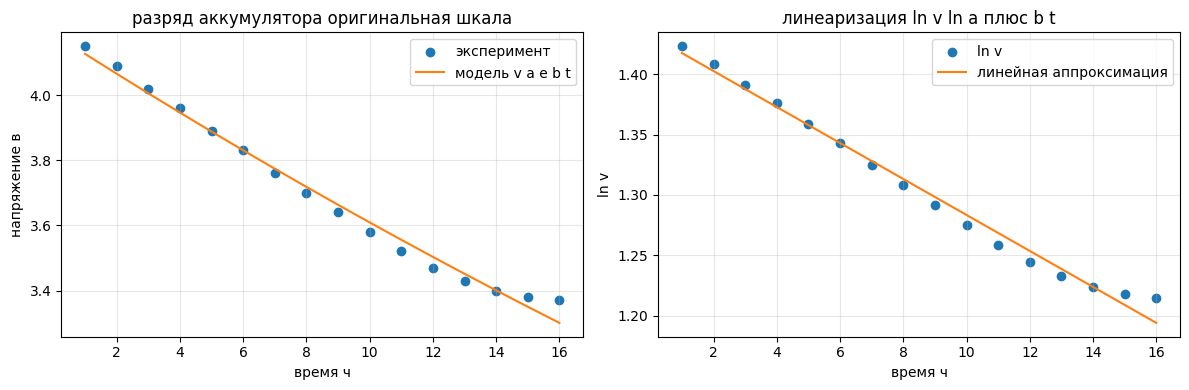

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# данные разрядки аккумулятора
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
voltage = np.array([4.15, 4.09, 4.02, 3.96, 3.89, 3.83, 3.76, 3.70, 3.64, 3.58, 3.52, 3.47, 3.43, 3.40, 3.38, 3.37])

# линеаризация ln v ln a плюс b t
lnV = np.log(voltage)
b_hat, ln_a_hat = np.polyfit(hours, lnV, 1)
a_hat = np.exp(ln_a_hat)

# восстановление модели и оценка погрешности
V_pred = a_hat * np.exp(b_hat * hours)
rmse = np.sqrt(np.mean((voltage - V_pred)**2))

print(f"параметры a {a_hat:.6f} b {b_hat:.6f}")
print(f"ско {rmse:.6f} в")

# прогноз на ближайшие часы
hours_future = np.arange(hours[-1] + 1, hours[-1] + 6)
V_future = a_hat * np.exp(b_hat * hours_future)
print("прогноз напряжения")
for h, v in zip(hours_future, V_future):
    print(f"час {h} значение {v:.4f}")

# визуализация исходные координаты и логарифмическая линеаризация
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# оригинальная шкала
axs[0].scatter(hours, voltage, label="эксперимент", color="C0")
axs[0].plot(hours, V_pred, label="модель v a e b t", color="C1")
axs[0].set_xlabel("время ч")
axs[0].set_ylabel("напряжение в")
axs[0].set_title("разряд аккумулятора оригинальная шкала")
axs[0].grid(True, alpha=0.3)
axs[0].legend()

# логарифмическая шкала
axs[1].scatter(hours, lnV, label="ln v", color="C0")
axs[1].plot(hours, ln_a_hat + b_hat * hours, label="линейная аппроксимация", color="C1")
axs[1].set_xlabel("время ч")
axs[1].set_ylabel("ln v")
axs[1].set_title("линеаризация ln v ln a плюс b t")
axs[1].grid(True, alpha=0.3)
axs[1].legend()

plt.tight_layout()
plt.show()

> Выполняется только Задание 3, Вариант 1.

# Задание 3 Вариант 1

## Описание задачи
Биологи проводили сравнительное исследование интенсивности основного обмена (BMR, Basal Metabolic Rate) у различных млекопитающих в зависимости от их массы тела. Согласно эмпирическому закону Клейбера, метаболизм животного подчиняется степенной зависимости. Полученные экспериментальные данные:

| Вид животного | Масса (кг) | Основной обмен (ккал/день) |
|---|---|---|
| Мышь | 0.03 | 1.2 |
| Крыса | 0.2 | 5.8 |
| Кролик | 2.0 | 45.0 |
| Кошка | 4.5 | 110.0 |
| Собака | 15 | 380.0 |
| Обезьяна | 35 | 920.0 |
| Человек | 70 | 1850.0 |
| Лошадь | 450 | 10500.0 |
| Слон | 5000 | 95000.0 |

## Задание

1. Предположите степенную зависимость вида $BMR = c \cdot M^\alpha$, где $M$ — масса животного, $BMR$ — основной обмен, $c$ и $\alpha$ — параметры модели.
2. Выполните логарифмическую линеаризацию: $\ln(BMR) = \ln(c) + \alpha \ln(M)$.
3. Постройте линейную регрессию для координат $(\ln M, \ln BMR)$:
   - найдите параметры линии регрессии;
   - вычислите $R^2$ для линеаризованной модели;
   - оцените погрешность определения параметров (по желанию).
4. Восстановите исходные параметры степенной функции:
   - $c = e^b$, где $b$ — свободный член линейной регрессии;
   - показатель степени $\alpha$.
5. Создайте комплексную визуализацию:
   - график в логарифмических координатах $(\ln M, \ln BMR)$ с линией регрессии;
   - график в исходных координатах со степенной кривой;
   - график остатков.
6. Вычислите коэффициент детерминации $R^2$ для исходной степенной модели и сравните с линеаризованной.
7. Проанализируйте результаты:
   - согласуется ли найденное значение $\alpha$ с законом Клейбера (теоретически $\alpha \approx 0.75$)?
   - что означает показатель степени $\alpha$ с физиологической точки зрения?
8. Используя полученную модель, предскажите основной обмен для:
   - Льва массой 190 кг;
   - Енота массой 8 кг;
   - Синего кита массой 150 000 кг.

параметры c 28.763022 альфа 0.955183
r2 лог 0.998909 r2 исходная 0.998646
теоретическое альфа около 0 75


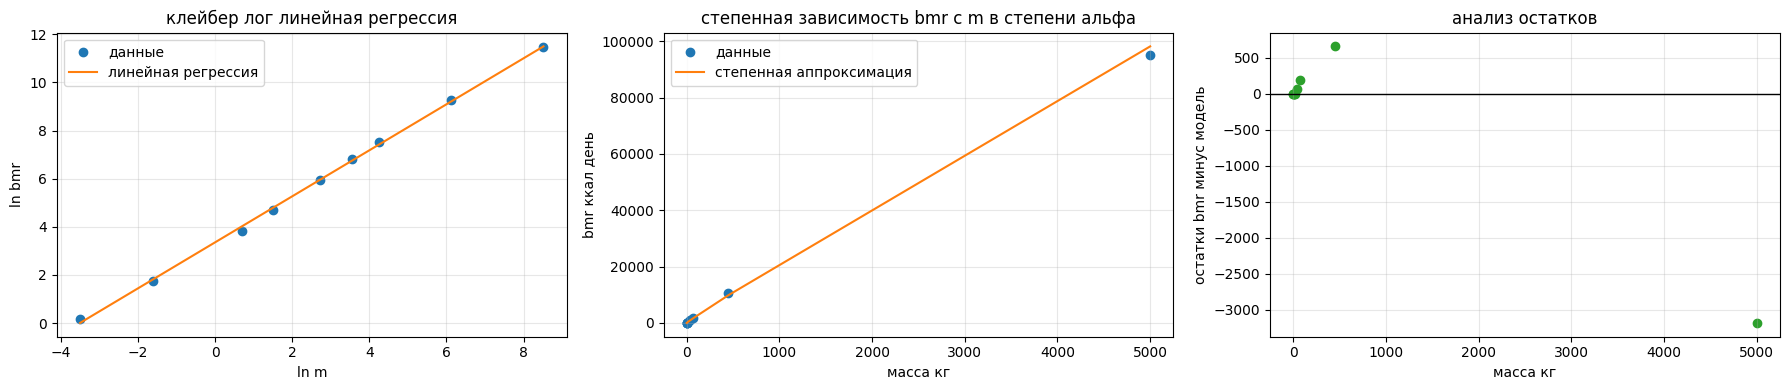

прогноз bmr лев 190 кг 4319.78 ккал день
прогноз bmr енот 8 кг 209.63 ккал день
прогноз bmr синий кит 150000 кг 2529009.21 ккал день


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def power_law_regression(x, y):
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    ln_x = np.log(x)
    ln_y = np.log(y)
    alpha, ln_c = np.polyfit(ln_x, ln_y, 1)
    c = np.exp(ln_c)
    y_pred = c * (x ** alpha)
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r2_orig = 1 - ss_res / ss_tot
    ln_y_pred = ln_c + alpha * ln_x
    ss_res_log = np.sum((ln_y - ln_y_pred) ** 2)
    ss_tot_log = np.sum((ln_y - np.mean(ln_y)) ** 2)
    r2_log = 1 - ss_res_log / ss_tot_log
    return c, alpha, y_pred, r2_orig, r2_log, ln_x, ln_y, ln_y_pred

# задание 3 вариант 1 закон клейбера
M = np.array([0.03, 0.2, 2.0, 4.5, 15, 35, 70, 450, 5000], dtype=float)
BMR = np.array([1.2, 5.8, 45.0, 110.0, 380.0, 920.0, 1850.0, 10500.0, 95000.0], dtype=float)

c, alpha, BMR_pred, r2_orig, r2_log, lnM, lnBMR, lnBMR_pred = power_law_regression(M, BMR)
print(f"параметры c {c:.6f} альфа {alpha:.6f}")
print(f"r2 лог {r2_log:.6f} r2 исходная {r2_orig:.6f}")
print("теоретическое альфа около 0 75")

fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# логарифмические координаты
axs[0].scatter(lnM, lnBMR, label="данные", color="C0")
axs[0].plot(lnM, lnBMR_pred, label="линейная регрессия", color="C1")
axs[0].set_xlabel("ln m")
axs[0].set_ylabel("ln bmr")
axs[0].set_title("клейбер лог линейная регрессия")
axs[0].grid(True, alpha=0.3)
axs[0].legend()

# исходные координаты
axs[1].scatter(M, BMR, label="данные", color="C0")
axs[1].plot(M, BMR_pred, label="степенная аппроксимация", color="C1")
axs[1].set_xlabel("масса кг")
axs[1].set_ylabel("bmr ккал день")
axs[1].set_title("степенная зависимость bmr c m в степени альфа")
axs[1].grid(True, alpha=0.3)
axs[1].legend()

# остатки
residuals = BMR - BMR_pred
axs[2].scatter(M, residuals, color="C2")
axs[2].axhline(0, color="black", linewidth=1)
axs[2].set_xlabel("масса кг")
axs[2].set_ylabel("остатки bmr минус модель")
axs[2].set_title("анализ остатков")
axs[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

for animal, mass in [("Лев", 190), ("Енот", 8), ("Синий кит", 150000)]:
    pred = c * (mass ** alpha)
    print(f"прогноз bmr {animal.lower()} {mass} кг {pred:.2f} ккал день")